In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx
from operator import itemgetter

In [2]:
df_questions=pd.read_csv("questions_2020_2022.csv")

In [3]:
df_questions.head(1)

,Tags,User_Name,Title,View_count,Down_vote_count,Up_vote_count,Answer_count,Score,Creation_date,Question_id,Question_link,Is_Answered
0,macos|-|python|-|zsh|-|compression|-|tar|-|,Saaru Lindest&#248;kke,Why are tar.xz files 15x smaller when using Py...,57933,0,242,3,242,242,1615657068,1633073,https://superuser.com/questions/1633073/why-ar...


In [6]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')
from operator import itemgetter

#### Analisi titoli

In [96]:
from PIL import Image 
import PIL 

In [15]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mir-9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

In [17]:
stopwords = stopwords.words('english')
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if not word in stopwords
    ] #creo una lista con le parole piene

    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

In [18]:
df_questions['cleaned_title']=df_questions['Title'].apply(lambda x: process_text(x))
df_questions['Title']=df_questions['Title'].apply(lambda x: remove_content(x))

In [19]:
temp=' '.join(df_questions['cleaned_title'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)

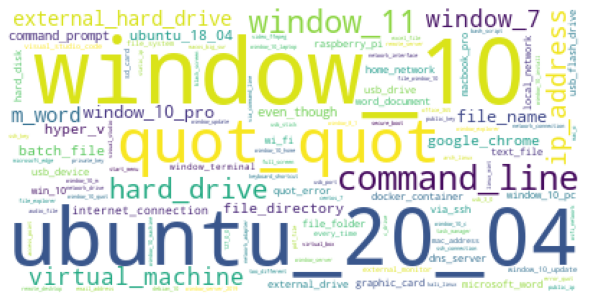

In [107]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

###### function to plot the top n occurrences of phrases in the given ngram range

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
title_list=df_questions['cleaned_title']

In [110]:
#Si considerano i primi 20 ngrammi
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show()

In [111]:
#unigrammi
plot_topn(title_list, ngram_range=(1,1))

In [112]:
plot_topn(title_list, ngram_range=(2,2))

In [113]:
plot_topn(title_list, ngram_range=(3,3))

###### Creo la lista di bigrammi e trigammi con le loro frequenze

In [114]:
#Si considerano i primi 20 ngrammi
def plot_topn(sentences, ngram_range=(1,3), top=1000,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    return res 

    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show()

In [115]:
bigrammi =plot_topn(title_list, ngram_range=(2,2))

In [116]:
trigrammi = plot_topn(title_list, ngram_range=(3,3))

In [117]:
bigrammi.to_csv('bigrammi.csv', encoding='utf-8', index=False)

In [119]:
bigrams = pd.read_csv('bigrammi.csv')
bigrammi.tail(10)

,index,0
990,error using,15
991,quot access,15
992,read file,15
993,windows screen,15
994,nvme drive,15
995,event viewer,15
996,exe windows,15
997,cell reference,15
998,could cause,15
999,file sharing,15


In [120]:
trigrammi.to_csv('trigrammi.csv', encoding='utf-8', index=False)

In [122]:
trigrams = pd.read_csv('trigrammi.csv')
trigrams.tail(3)

,index,0
997,hash sum mismatch,3
998,change mouse cursor,3
999,change language windows,3


In [123]:
bigrams.columns=['bigram','freq']
bigrams.columns=['bigram','freq']

###### Dataset di bigrammi e trigrammi aggiustati e salvati nei file csv 

In [124]:
trigrams.to_csv('trigrammi.csv', encoding='utf-8', index=False)
bigrams.to_csv('bigrammi.csv', encoding='utf-8', index=False)

#### Word Cloud Bigrammi
reference:
https://www.kaggle.com/code/peterwittek/wordclouds-of-titles-and-abstracts-with-n-grams/notebook

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output

In [91]:
def get_bitrigrams(full_text, threshold=30):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    trigram_measures = TrigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    finder = TrigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    trigrams = {" ".join(words): "_".join(words)
                for words in finder.above_score(trigram_measures.likelihood_ratio, threshold)}
    return bigrams, trigrams


def replace_bitrigrams(text, bigrams, trigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in trigrams.items():
            t_new = t_new.replace(k, v)
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts


def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text


def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    very_processed_texts = replace_bitrigrams(processed_texts, bigrams, trigrams)
    return " ".join(very_processed_texts)

In [92]:
wordnet_lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
translate_table = dict((ord(char), " ") for char in string.punctuation)

In [125]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams, trigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = []
        for k, v in trigrams.items():
            c = doc.count(k)
            if c > 0:
                current_doc += [v] * c
                doc = doc.replace(k, v)
        #for k, v in bigrams.items():
         #   current_doc += [v] * doc.count(" " + k + " ")
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)

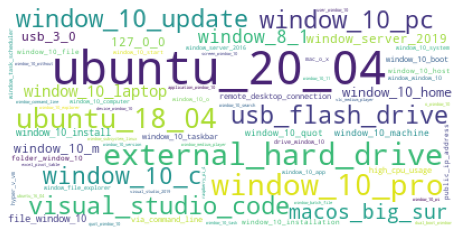

In [126]:
wordcloud = WordCloud(background_color="white").generate(use_ngrams_only(df_questions["Title"], wordnet_lemmatizer, translate_table,stop))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()